In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
N = 1000

Создадим сетку параметров $\theta$ распределения Бернулли с шагом 0.01 на отрезке $[0, 1]$

In [3]:
thetas = np.linspace(0, 1, 101)

Построим график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от θ. Нижняя оценка дисперсии равна $\frac{1}{I_X(\theta)}$, которая в случае распределения Бернулли равна $\frac{\theta (1 - \theta)}{N}$

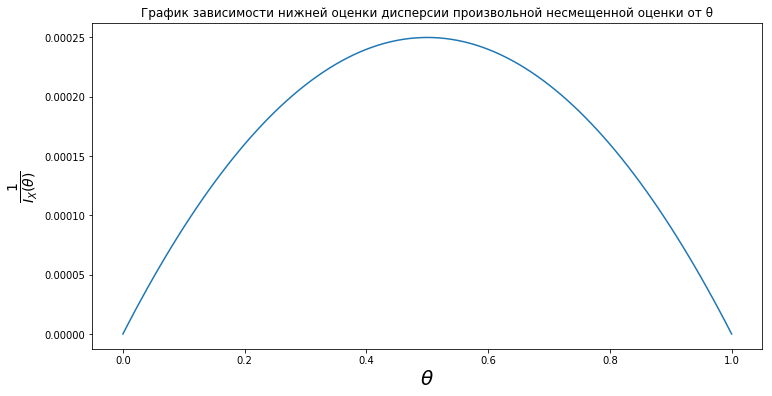

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(thetas, thetas * (1 - thetas) / N)
plt.title(r"""График зависимости нижней оценки 
          дисперсии произвольной несмещенной оценки от θ""")
plt.xlabel(r"$\theta$", fontsize=20)
plt.ylabel(r"$\frac{1}{I_X(\theta)}$", fontsize=20);

Как видно из графика, данная нижняя оценка симметрична и достигает своего максимума при $\theta = 0.5$.

In [5]:
K = 500

Напишем функцию, считающую бутстрепную оценку дисперсии. В данном случае, бутстреп параметрический, количество бутстрепных выборок равно $K = 500$, размер каждой выборки равен $N = 1000$

In [6]:
def GetVarianceParam(estimator):
    bootstrap_estimators = np.zeros(K)
    for k in range(K):
        bern_rv = sts.bernoulli(estimator)
        bootstrap_param_sample = bern_rv.rvs(N)
        bootstrap_estimators[k] = np.mean(bootstrap_param_sample)
    return np.mean(bootstrap_estimators ** 2) - \
            np.mean(bootstrap_estimators) ** 2

Для каждого значения $\theta$ из нашей сетки посчитаем эффективную оценку $\hat{\theta} = \overline{X}$, которая также является несмещенной, а затем бутстрепную оценку дисперсии этой эффективной оценки:

In [7]:
bootstrap_variance_estimators = np.zeros(101)
for i, theta in enumerate(thetas):
    bern_rv = sts.bernoulli(theta)
    sample = bern_rv.rvs(N)
    effective_estimator = np.mean(sample)
    bootstrap_variance_estimators[i] = GetVarianceParam(effective_estimator)

Нарисуем график зависимости бутстрепной оценки дисперсии эффективной оценки от параметра $\theta$:

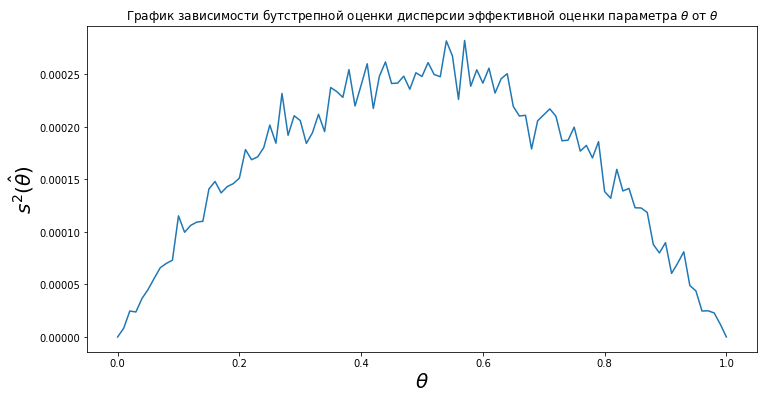

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(thetas, bootstrap_variance_estimators)
plt.title(r"""График зависимости бутстрепной оценки 
          дисперсии эффективной оценки параметра $\theta$ от $\theta$""")
plt.xlabel(r"$\theta$", fontsize=20)
plt.ylabel(r"$s^2(\hat{\theta})$", fontsize=20);

$\textbf{Вывод:}$ Как видно из графика, бутстрепная оценка дисперсии эффективной, несмещенной оценки приближается к нижней оценки дисперсии произвольной несмещенной оценки, что означает, что бутстрепный метод является очень хорошим методом для оценивание дисперсии эффективных оценок и почти не улучшаем, так как он почти равен нижней оценки дисперсии.